# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | margaret river
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | somerton
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | saipan
Processing Record 7 of Set 1 | tura
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | dalian
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | fort st. john
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | crane
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | el haouaria
Processing Record 19 of Set 1 | port mathurin
Processing Record 20 of Set 1 | port blair
Processing Record 21 of Set 1 | mount isa
Processing Record 22 of Set 1 | 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,273.94,98,100,9.26,CA,1699584181
1,margaret river,-33.9500,115.0667,290.47,53,79,4.68,AU,1699583783
2,port alfred,-33.5906,26.8910,289.39,85,0,2.82,ZA,1699584315
3,somerton,32.5964,-114.7097,295.31,16,0,2.57,US,1699584316
4,albany,42.6001,-73.9662,279.67,81,100,0.45,US,1699584316


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/kaijagregory/Desktop/python-api-challenge/WeatherPy/output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("/Users/kaijagregory/Desktop/python-api-challenge/WeatherPy/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,273.94,98,100,9.26,CA,1699584181
1,margaret river,-33.9500,115.0667,290.47,53,79,4.68,AU,1699583783
2,port alfred,-33.5906,26.8910,289.39,85,0,2.82,ZA,1699584315
3,somerton,32.5964,-114.7097,295.31,16,0,2.57,US,1699584316
4,albany,42.6001,-73.9662,279.67,81,100,0.45,US,1699584316


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

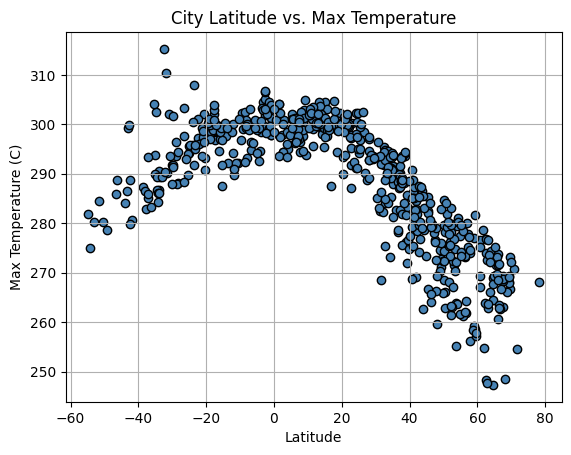

In [23]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"], 
            facecolor="steelblue",
            edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("/Users/kaijagregory/Desktop/python-api-challenge/WeatherPy/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

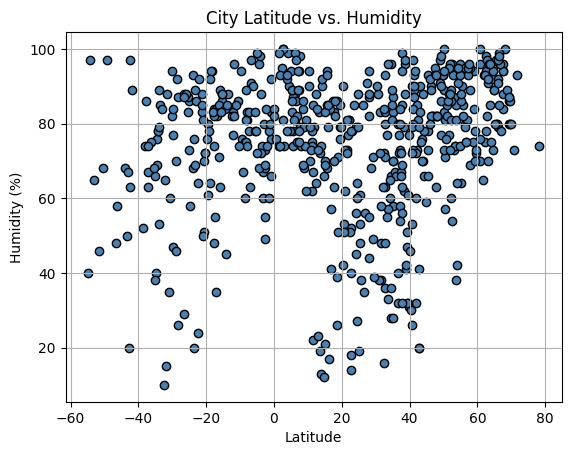

In [22]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"], 
            facecolor="steelblue", 
            edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("/Users/kaijagregory/Desktop/python-api-challenge/WeatherPy/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

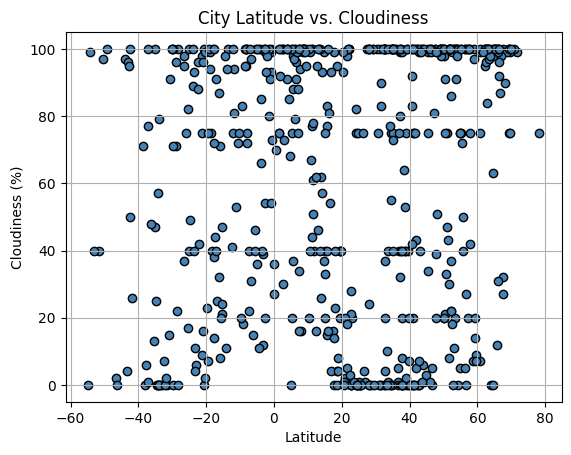

In [21]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"], 
            facecolor="steelblue", 
            edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("/Users/kaijagregory/Desktop/python-api-challenge/WeatherPy/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

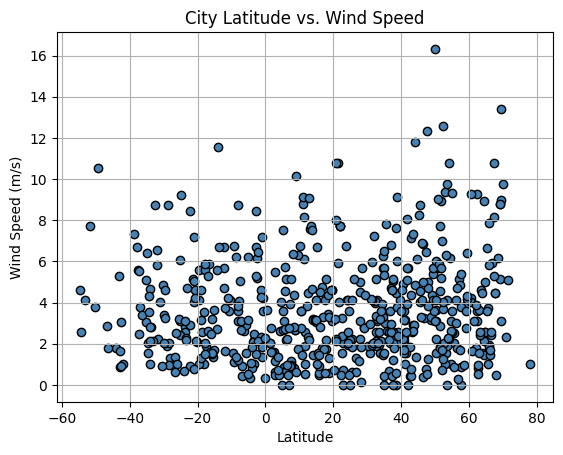

In [25]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"], 
            facecolor="steelblue", 
            edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("/Users/kaijagregory/Desktop/python-api-challenge/WeatherPy/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [99]:
# Define a function to create Linear Regression plots
def plot_linear_regression(df, x_values, y_values, coordinates):
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(df[x_values], df[y_values])
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create a scatter plot and plot the regression line
    plt.scatter(df[x_values], df[y_values])
    plt.plot(df[x_values], intercept + slope * df[x_values], color="red", linewidth=1)
    plt.xlabel(x_values)
    plt.ylabel(y_values)
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, coordinates, fontsize=15, color="red")
    
    print(f"The r value is: {r_value}")
    plt.show()


In [96]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,273.94,98,100,9.26,CA,1699584181
3,somerton,32.5964,-114.7097,295.31,16,0,2.57,US,1699584316
4,albany,42.6001,-73.9662,279.67,81,100,0.45,US,1699584316
5,saipan,15.1355,145.7010,304.54,70,40,6.69,MP,1699584316
6,tura,25.5198,90.2201,296.90,61,0,0.65,IN,1699584317


In [97]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,margaret river,-33.9500,115.0667,290.47,53,79,4.68,AU,1699583783
2,port alfred,-33.5906,26.8910,289.39,85,0,2.82,ZA,1699584315
7,edinburgh of the seven seas,-37.0676,-12.3116,285.17,67,77,3.77,SH,1699584317
9,waitangi,-43.9535,-176.5597,284.16,68,97,1.79,NZ,1699584317
11,port-aux-francais,-49.3500,70.2167,278.71,97,100,10.55,TF,1699584318


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.8789305100452625


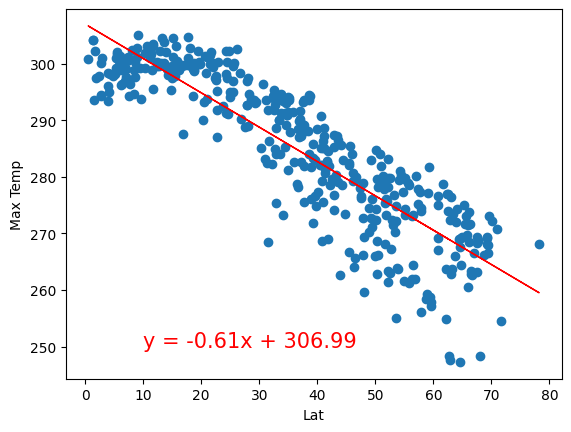

In [100]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Max Temp", (10,250))

The r value is: 0.6579415337167204


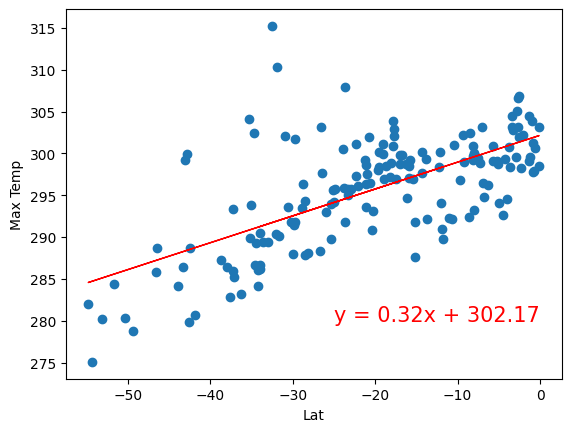

In [101]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Max Temp", (-25,280) )

**Discussion about the linear relationship:** "In examining the relationship between latitude and maximum temperature in both the Northern and Southern Hemispheres, distinct patterns emerge. In the Northern Hemisphere, the scatter plot reveals a strong negative correlation with an r-value of -0.88. The linear regression equation for this hemisphere, y = -0.61x + 306.99, further emphasizes the significant downward trend, suggesting that as one moves north from the equator, there is a notable decrease in maximum temperatures. Conversely, in the Southern Hemisphere, the scatter plot shows a moderate positive correlation with an r-value of 0.66. The linear regression equation for this hemisphere, y = 0.32x + 302.17, indicates a gradual increase in maximum temperatures as one moves towards the South Pole. These findings underscore the influence of latitude on temperature variations and highlight the contrasting temperature trends between the two hemispheres."

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.19491214944314575


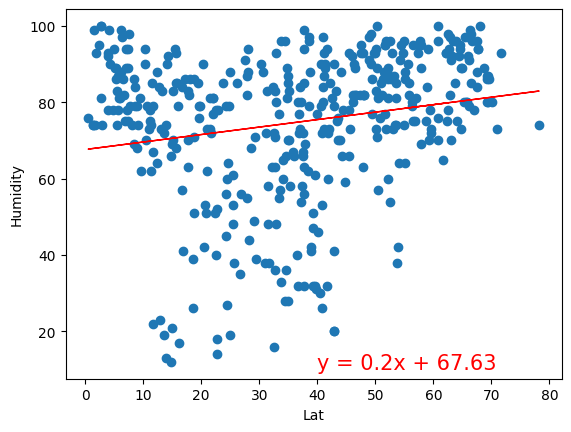

In [102]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Humidity", (40,10))

The r value is: 0.2642322588694946


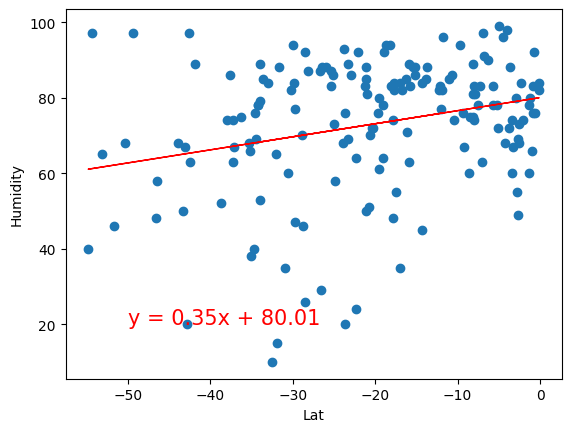

In [103]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Humidity", (-50,20))

**Discussion about the linear relationship:** Investigating the linear relationship between latitude and humidity in both the Northern and Southern Hemispheres provides insights into geographical influences on atmospheric moisture. In the Northern Hemisphere, the scatter plot displays a weak positive correlation with an r-value of 0.19. The associated linear regression equation, y = -0.2x + 67.63, indicates a subtle decrease in humidity as one moves northward from the equator. In contrast, the Southern Hemisphere exhibits a slightly stronger positive correlation with an r-value of 0.26. The linear regression equation for this hemisphere, y = 0.35x + 80.01, suggests a gradual increase in humidity as one moves southward. While these correlations are relatively modest, they shed light on the nuanced relationship between latitude and humidity, emphasizing the importance of considering hemisphere-specific patterns in understanding regional atmospheric conditions.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.09535493971167358


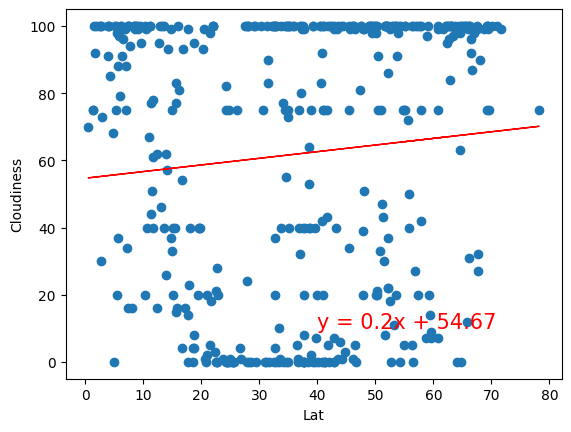

In [104]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Cloudiness", (40,10))

The r value is: 0.239812157794743


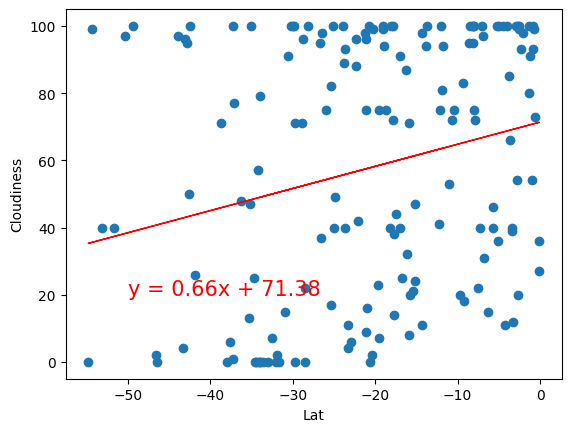

In [105]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Cloudiness", (-50,20))

**Discussion about the linear relationship:** "Examining the linear relationship between latitude and cloudiness in both the Northern and Southern Hemispheres provides valuable insights into regional atmospheric patterns. In the Northern Hemisphere, the scatter plot reveals a weak positive correlation with an r-value of 0.10. The associated linear regression equation, y = -0.2x + 54.67, suggests a subtle decrease in cloudiness as one moves northward from the equator. Conversely, the Southern Hemisphere displays a somewhat stronger positive correlation with an r-value of 0.24. The linear regression equation for the southern hemisphere, y = 0.66x + 71.38, indicates a gradual increase in cloudiness as one moves toward the South Pole. While these correlations are relatively modest, they contribute to our understanding of how latitude can influence cloud cover, emphasizing the need to consider hemisphere-specific trends in studying regional weather patterns."

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.17578158243346603


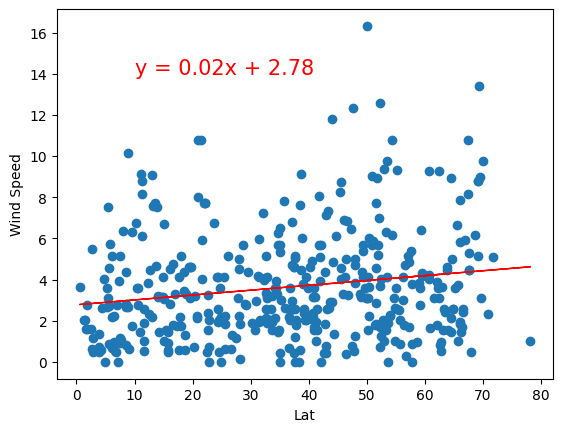

In [107]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Wind Speed", (10,14))

The r value is: -0.07095165018318726


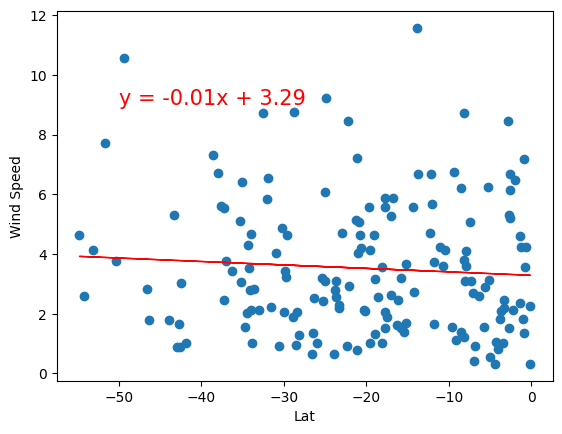

In [109]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Wind Speed", (-50,9))

**Discussion about the linear relationship:** 
"Exploring the linear relationship between latitude and wind speed in both the Northern and Southern Hemispheres reveals intriguing patterns in atmospheric dynamics. In the Northern Hemisphere, the scatter plot displays a weak positive correlation with an r-value of 0.18. The corresponding linear regression equation, y = -0.2x + 2.78, suggests a subtle increase in wind speed as one moves north from the equator. Meanwhile, the Southern Hemisphere exhibits a weak negative correlation with an r-value of -0.07. The linear regression equation for the southern hemisphere, y = -0.01x + 3.29, indicates a marginal decrease in wind speed as one moves towards the South Pole. While both correlations are relatively modest, they contribute valuable insights into the latitude-dependent variations in wind patterns, emphasizing the nuanced nature of regional atmospheric circulation."